In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [40]:
df = pd.read_csv(r'1240455_114104.csv', parse_dates = ['historybegdate'], index_col = ['historybegdate'])
df.head()


,partid,locid,historyamount
historybegdate,,,
2015-07-04,1240455,114104,153
2015-07-11,1240455,114104,184
2015-07-18,1240455,114104,2
2015-07-25,1240455,114104,154
2015-08-01,1240455,114104,169


In [41]:
df = df.drop(['locid'],axis=1)
df = df.drop(['partid'],axis=1)

df

,historyamount
historybegdate,
2015-07-04,153
2015-07-11,184
2015-07-18,2
2015-07-25,154
2015-08-01,169
2015-08-08,167
2015-08-15,170
2015-08-22,136
2015-08-29,204


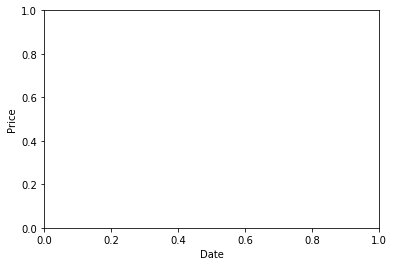

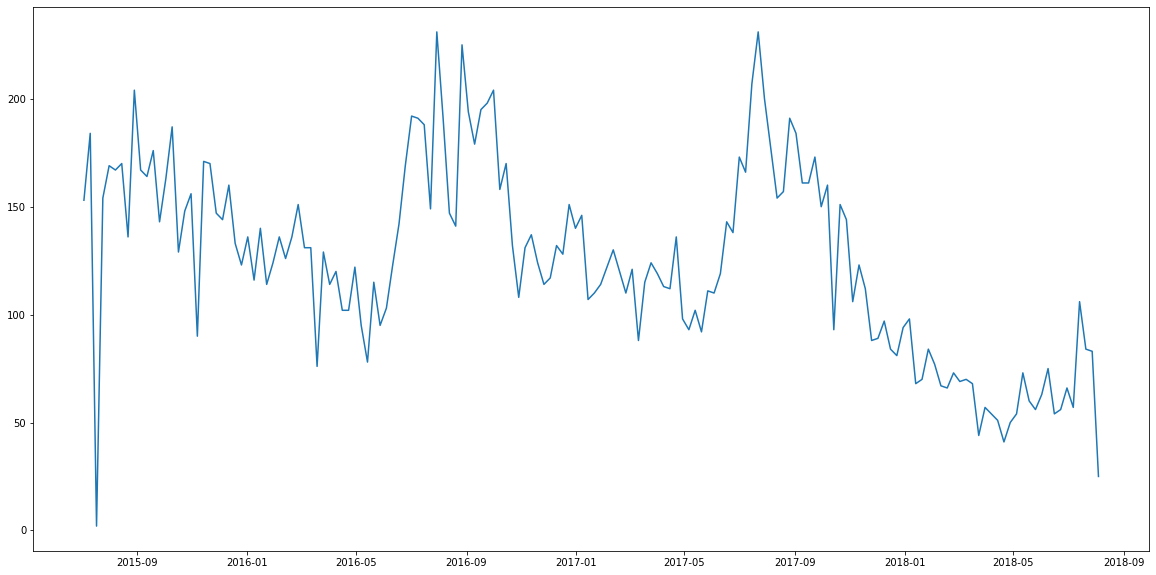

In [43]:
plt.xlabel('Date')
plt.ylabel('Price')
plt.figure(figsize=(20,10))
plt.plot(df)

In [44]:
df = df.iloc[3:]

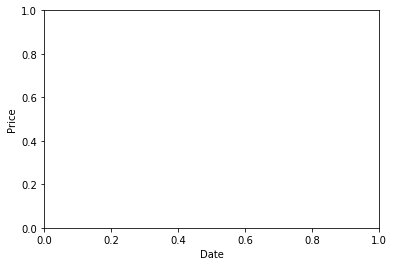

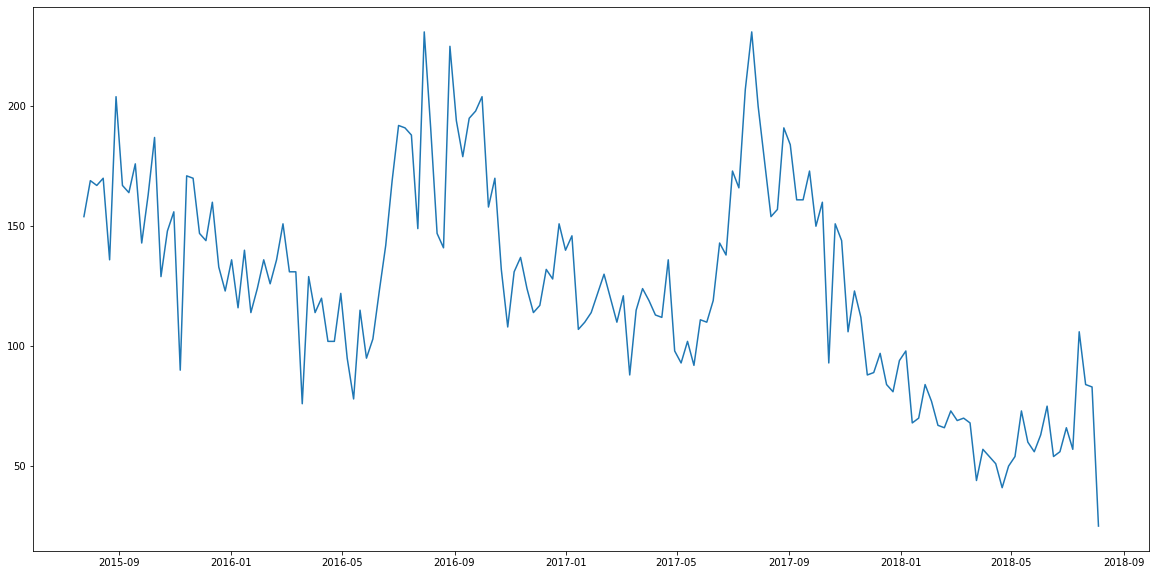

In [45]:
plt.xlabel('Date')
plt.ylabel('Price')
plt.figure(figsize=(20,10))
plt.plot(df)

In [46]:
rolling_mean = df.rolling(window = 4).mean()
rolling_std = df.rolling(window = 4).std()
print(rolling_mean.head(20))
print(len(rolling_mean))

                historyamount
historybegdate               
2015-07-25                NaN
2015-08-01                NaN
2015-08-08                NaN
2015-08-15             165.00
2015-08-22             160.50
2015-08-29             169.25
2015-09-05             169.25
2015-09-12             167.75
2015-09-19             177.75
2015-09-26             162.50
2015-10-03             161.50
2015-10-10             167.25
2015-10-17             155.50
2015-10-24             156.75
2015-10-31             155.00
2015-11-07             130.75
2015-11-14             141.25
2015-11-21             146.75
2015-11-28             144.50
2015-12-05             158.00
159


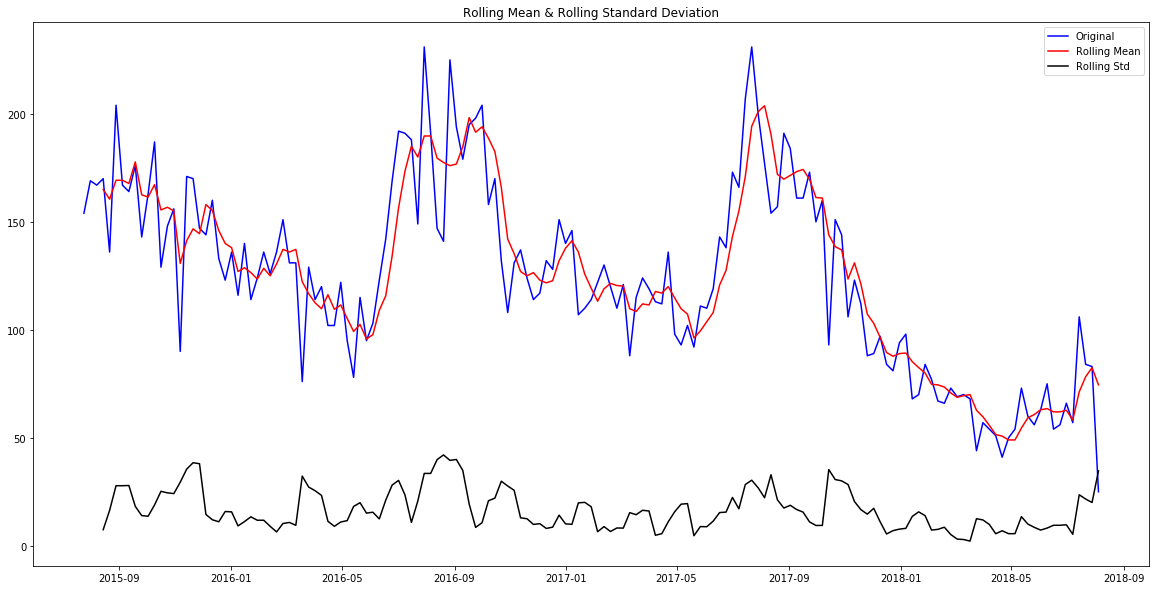

In [47]:
plt.figure(figsize=(20,10))
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()


In [48]:
result = adfuller(df['historyamount'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('No. OF Lags USed: {}'.format(result[2]))
print('No. OF Observations USed: {}'.format(result[3]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.7160419472275343
p-value: 0.42286671175249696
No. OF Lags USed: 2
No. OF Observations USed: 156
Critical Values:
	1%: -3.4729792729247793
	5%: -2.8802520918255534
	10%: -2.5767469641683105


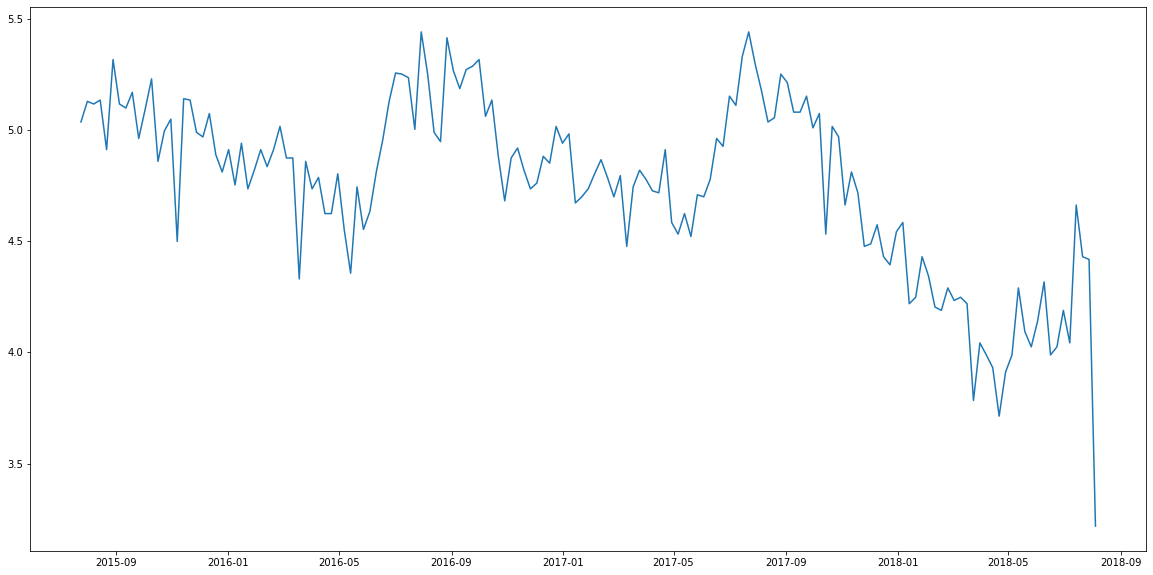

In [49]:
df_log = np.log(df)
plt.figure(figsize=(20,10))
plt.plot(df_log)

In [50]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=4).mean()
    rolling_std = timeseries.rolling(window=4).std()
    
    # rolling statistics plot
    plt.figure(figsize=(20,10))
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['historyamount'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('No. OF Lags USed: {}'.format(result[2]))
    print('No. OF Observations USed: {}'.format(result[3]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

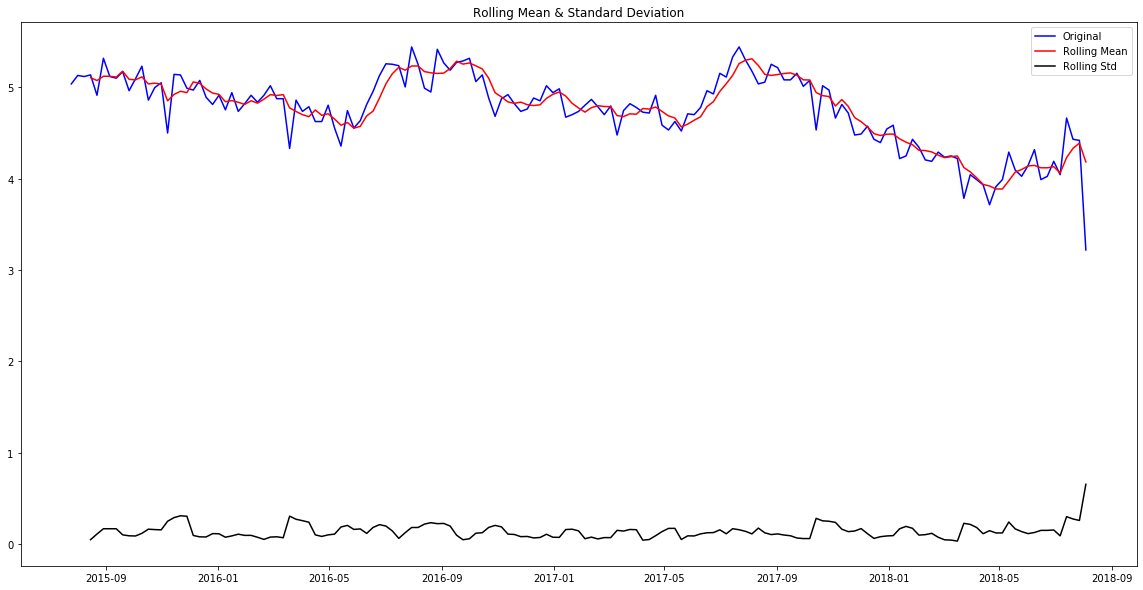

ADF Statistic: -0.937484932717656
p-value: 0.7753776567061916
No. OF Lags USed: 3
No. OF Observations USed: 155
Critical Values:
	1%: -3.4732590518613002
	5%: -2.880374082105334
	10%: -2.5768120811654525


In [51]:
#Taking Data with log scale 
get_stationarity(df_log)
#Can see data nt ststionary with p value and ADF Statistics 

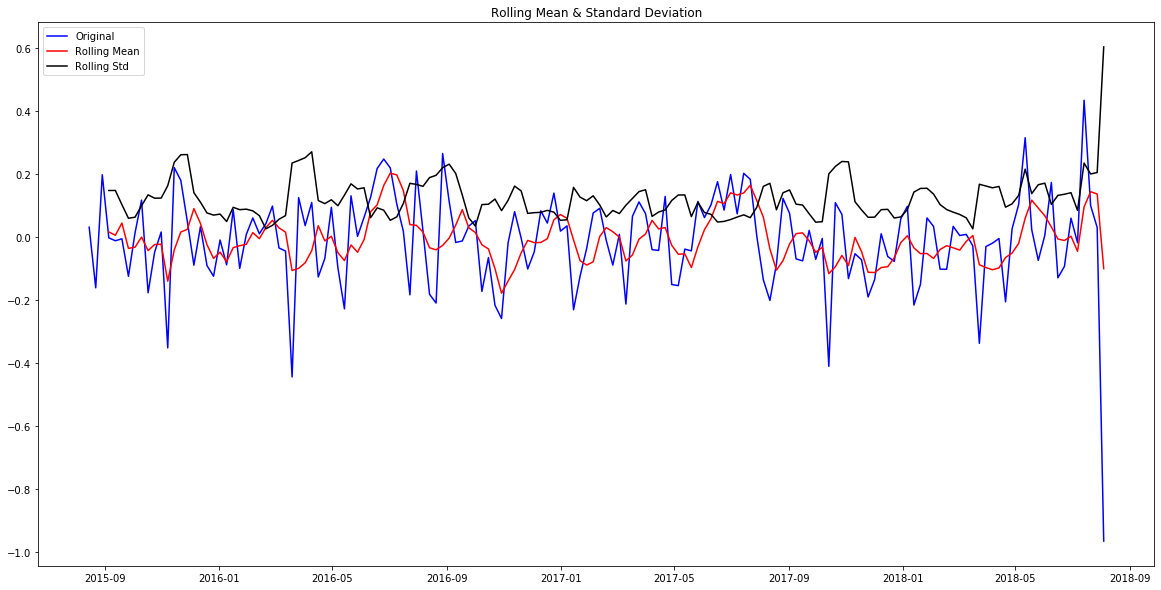

ADF Statistic: -5.744790609234148
p-value: 6.157066202507356e-07
No. OF Lags USed: 3
No. OF Observations USed: 152
Critical Values:
	1%: -3.474120870218417
	5%: -2.880749791423677
	10%: -2.5770126333102494


In [52]:
#Deducting the mean of log values from log data set 
rolling_mean = df_log.rolling(window=4).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)
# This is giving us good  results as p value is extremely low and hence data is quite stationary 

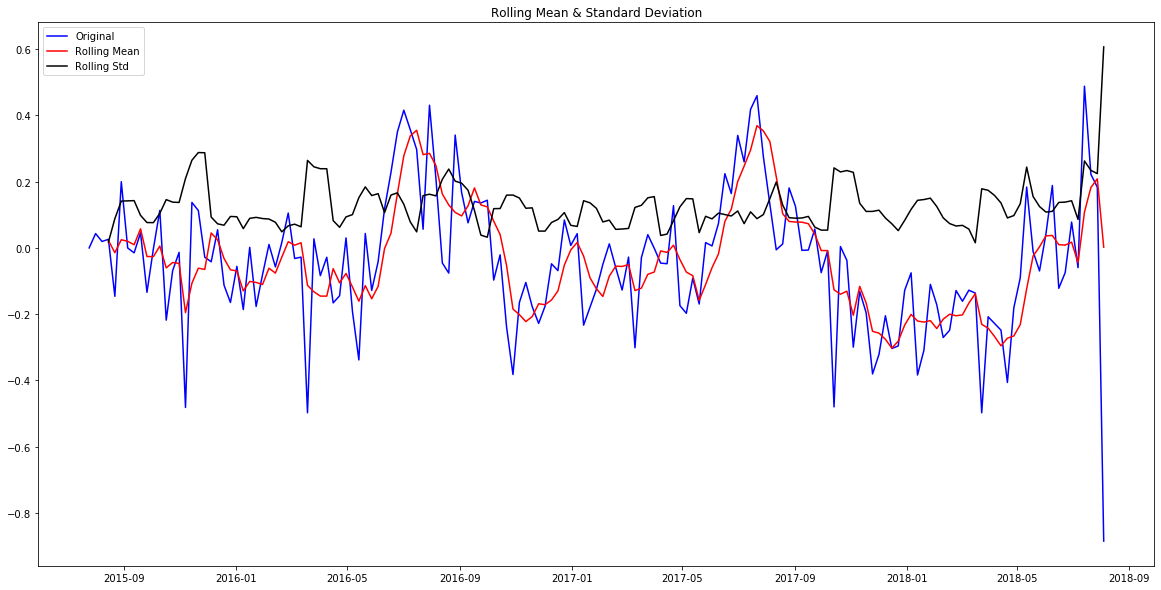

ADF Statistic: -4.73723676413066
p-value: 7.159410127590108e-05
No. OF Lags USed: 1
No. OF Observations USed: 157
Critical Values:
	1%: -3.472703119504854
	5%: -2.880131672353732
	10%: -2.5766826861130268


In [53]:
#Subtracting exponential decay mean from log data 
rolling_mean_exp_decay = df_log.ewm(halflife=5, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
get_stationarity(df_log_exp_decay)
#THis looks like best result as our p value is low and from adf statistics we can say that we are 95% sure that 
#data is stationary

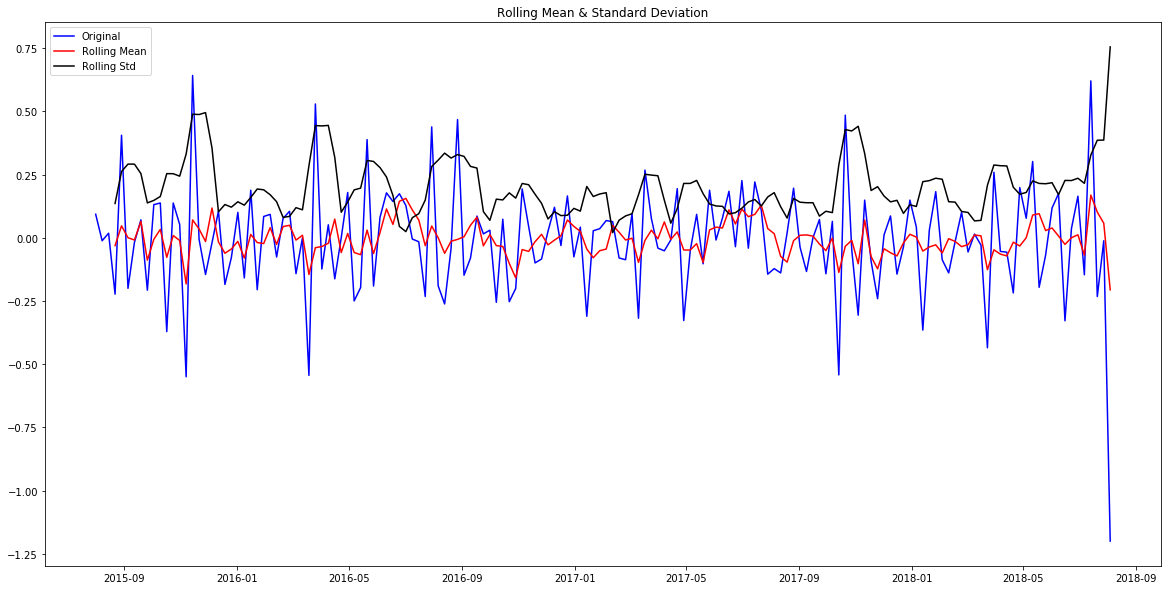

ADF Statistic: -8.99942352982877
p-value: 6.558718314371413e-15
No. OF Lags USed: 2
No. OF Observations USed: 155
Critical Values:
	1%: -3.4732590518613002
	5%: -2.880374082105334
	10%: -2.5768120811654525


In [54]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)
#Very much staionary as p value is extremely low and 99% confidence that data is staionary 

In [55]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_log_shift, nlags=20)
lag_pacf = pacf(df_log_shift, nlags=20, method='ols')#ordinary least square method


Text(0.5, 1.0, 'Autocorrelation Function')

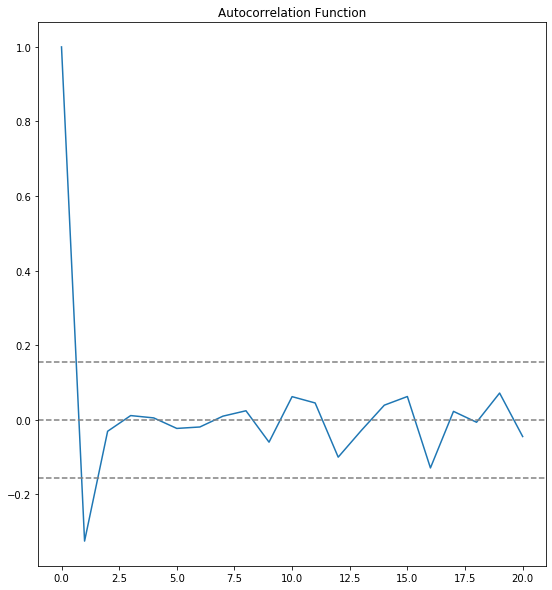

In [56]:
#Plot ACF: 
plt.figure(figsize=(20,10))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#q= The lag value where the ACF chart crosses the upper confidence interval for the first time.
#If you notice closely, in this case q=1.

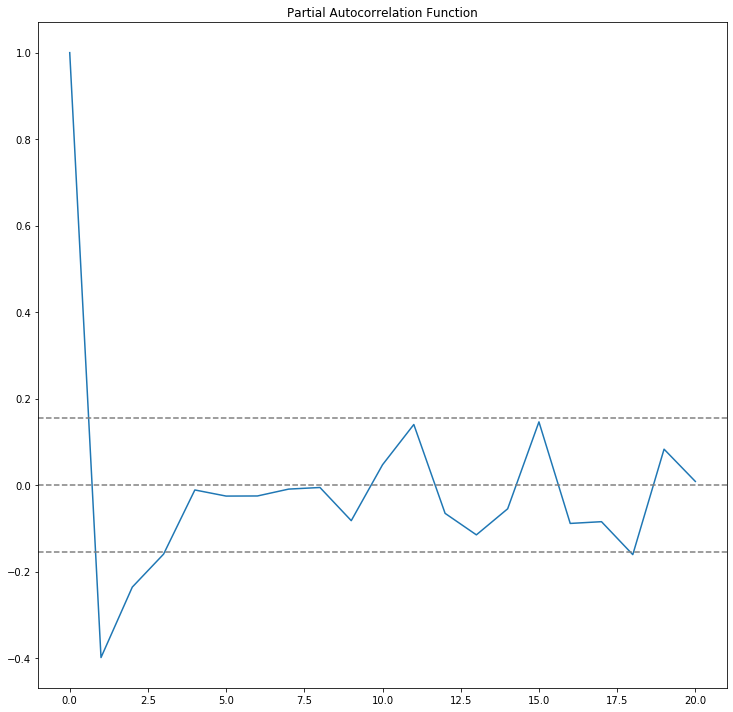

In [57]:
#Plot PACF:
plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
#p – The lag value where the PACF chart crosses the upper confidence interval for the first time. 
#If you notice closely, in this case p=1.

c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)


aic value for this model is  -51.54575583587712
Plotting AR Model


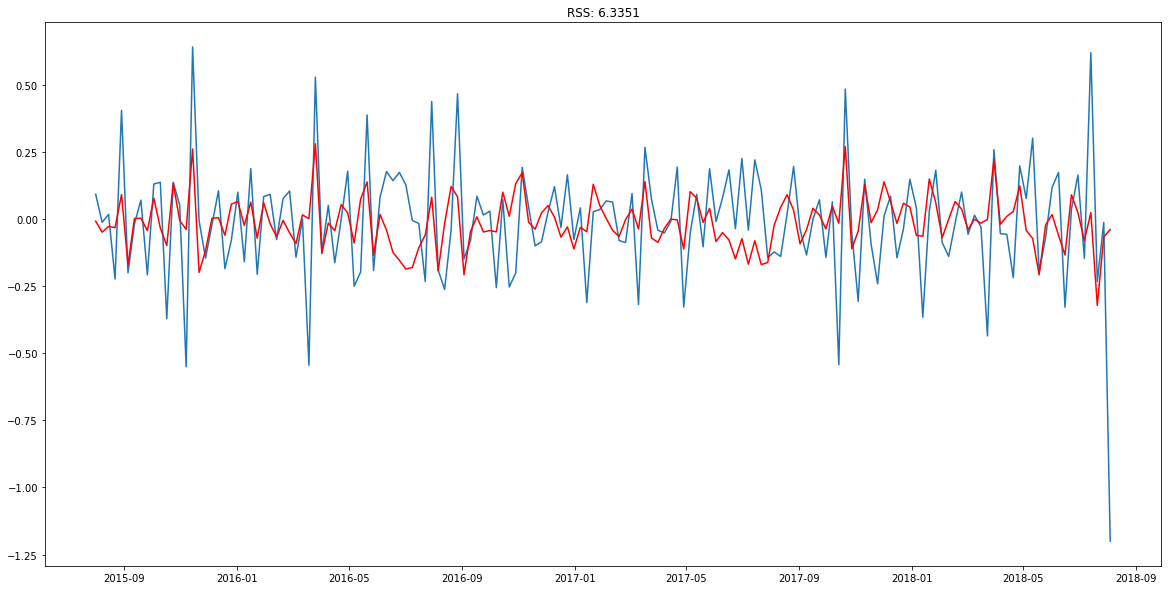

In [101]:
# Applying ARIMA model
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(1,1,1))# (p,d,q)
results = model.fit()
print('aic value for this model is ',results.aic)
plt.figure(figsize=(20,10))
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')
#plt.title(sum(results.fittedvalues-df_log_shift['historyamount'])**2)
plt.title('RSS: %.4f'% sum((results.fittedvalues-df_log_shift['historyamount'])**2))
print('Plotting AR Model')

In [91]:
df_log_forecast = results.forecast(steps=52)[0]
print(df_log_forecast)

[3.8232968  3.83807458 3.83108342 3.82328857 3.81546406 3.80763844
 3.79981279 3.79198714 3.78416148 3.77633583 3.76851017 3.76068452
 3.75285886 3.74503321 3.73720755 3.7293819  3.72155624 3.71373059
 3.70590493 3.69807928 3.69025362 3.68242797 3.67460231 3.66677666
 3.658951   3.65112535 3.64329969 3.63547404 3.62764839 3.61982273
 3.61199708 3.60417142 3.59634577 3.58852011 3.58069446 3.5728688
 3.56504315 3.55721749 3.54939184 3.54156618 3.53374053 3.52591487
 3.51808922 3.51026356 3.50243791 3.49461225 3.4867866  3.47896094
 3.47113529 3.46330964 3.45548398 3.44765833]


In [102]:
final_prediction = np.exp(df_log_forecast)
print(final_prediction)
rng = pd.date_range(start = "9/22/2018",end = "9/20/2019",freq='W')
csv_data = pd.Series(final_prediction,index=rng)
print(type(csv_data))
print(csv_data)

[45.75480417 46.43597961 46.11247033 45.75442797 45.39781862 45.04393934
 44.69281677 44.34443117 43.99876127 43.65578591 43.31548408 42.97783494
 42.64281781 42.31041219 41.9805977  41.65335415 41.32866151 41.00649988
 40.68684953 40.3696909  40.05500456 39.74277123 39.43297179 39.12558728
 38.82059887 38.51798787 38.21773576 37.91982416 37.6242348  37.3309496
 37.03995059 36.75121995 36.46474    36.18049319 35.89846212 35.61862952
 35.34097824 35.06549128 34.79215178 34.52094299 34.2518483  33.98485124
 33.71993545 33.45708471 33.19628291 32.9375141  32.68076242 32.42601215
 32.17324769 31.92245356 31.67361439 31.42671495]
<class 'pandas.core.series.Series'>
2018-09-23    45.754804
2018-09-30    46.435980
2018-10-07    46.112470
2018-10-14    45.754428
2018-10-21    45.397819
2018-10-28    45.043939
2018-11-04    44.692817
2018-11-11    44.344431
2018-11-18    43.998761
2018-11-25    43.655786
2018-12-02    43.315484
2018-12-09    42.977835
2018-12-16    42.642818
2018-12-23    42.31

In [103]:
import os
path=r'C:\Users\80071\Desktop\PTC_Forecast'
csv_data.to_csv(os.path.join(path,r'1240455_114104_forecast.csv'))

c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


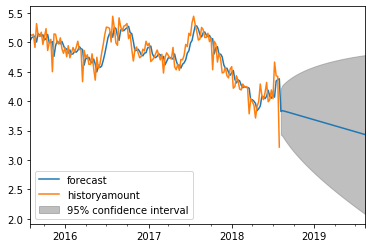

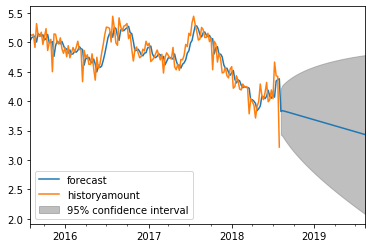

In [94]:
results.plot_predict(1,212)